In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv(os.getcwd()+'/kaggle/input/home-data-for-ml-course/train.csv')

In [4]:
train[(train['GrLivArea' ] >= 4000) & (train['SalePrice'] <= 300000)].index ## 소괄호 없이 하면 에러

Int64Index([523, 1298], dtype='int64')

In [5]:
train = train.drop(train[(train['GrLivArea' ] >= 4000) & (train['SalePrice'] <= 300000)].index) ## 아웃라이어 지우기

In [6]:
train = train.drop(train[(train['GarageArea' ] >= 1200) & (train['SalePrice'] <= 300000)].index) ## 아웃라이어 지우기

In [7]:
test = pd.read_csv(os.getcwd()+'/kaggle/input/home-data-for-ml-course/test.csv')

In [8]:
pd.options.display.max_columns = 500 ## 최대 보여줄 칼럼 개수
display(train, test) ## 전처리할게 너무 많다.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

In [9]:
## 통계량 추가. 지역별로 lot frontage의 평균을 추가.
all_data = pd.concat([train,test])
LotFrontage_mean = all_data.groupby('Neighborhood')['LotFrontage'].mean().to_frame('LotFrontage_mean').reset_index() 
## reset_index() --> dataframe으로 만들어준다.
## to_frame() --> 새로운 칼럼 이름으로 만든다.
all_data = pd.merge(all_data,LotFrontage_mean, on='Neighborhood', how = 'left')
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_mean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,71.336364
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,72.000000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,71.336364
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,69.951807
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,91.629630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,25.606061
2910,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,25.606061
2911,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9

In [10]:
all_data[all_data['Neighborhood'] == 'CollgCr']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_mean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,71.336364
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,71.336364
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,Stone,306.0,Gd,TA,PConc,Gd,TA,Av,Unf,0.0,Unf,0.0,1494.0,1494.0,GasA,Ex,Y,SBrkr,1494,0,0,1494,0.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3.0,840.0,TA,TA,Y,160,33,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500.0,71.336364
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,281.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1777.0,1777.0,GasA,Ex,Y,SBrkr,1795,0,0,1795,0.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,534.0,TA,TA,Y,171,159,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000.0,71.336364
32,33,20,RL,85.0,11049,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1234.0,1234.0,GasA,Ex,Y,SBrkr,1234,0,0,1234,0.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,484.0,TA,TA,Y,0,30,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,179900.0,71.336364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2848,2854,120,RM,37.0,4435,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,TwnhsE,1Story,6,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,170.0,Gd,TA,PConc,Gd,TA,Av,GLQ,717.0,Unf,0.0,131.0,848.0,GasA,Ex,Y,SBrkr,848,0,0,848,1.0,0.0,1,0,1,1,Gd,4,Typ,0,NaN,Attchd,2003.0,Fin,2.0,420.0,TA,TA,Y,140,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,NaN,71.336364
2849,2855,20,RL,70.0,8810,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1000.0,Unf,0.0,390.0,1390.0,GasA,Ex,Y,SBrkr,1390,0,0,1390,1.0,0.0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2003.0,RFn,2.0,545.0,TA,TA,Y,0,68,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal,NaN,71.336364
2850,2856,60,RL,74.0,8581,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Mn,Unf,0.0,Unf,0.0,851.0,851.0,GasA,Ex,Y,SBrkr,851,886,0,1737,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2006.0,RFn,2.0,578.0,TA,TA,Y,0,105,0,0,0,0,NaN,N

In [11]:
d = all_data[all_data['Neighborhood'] == 'CollgCr']
np.sort(d['LotFrontage'].unique())
# plt.figure(figsize=(20,12))
# sns.distplot(d['LotFrontage'])

array([ 36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,  47.,
        48.,  50.,  55.,  57.,  59.,  60.,  61.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  82.,  83.,  84.,  85.,  86.,  88.,  89.,  90.,
        91.,  93.,  94.,  95.,  96.,  97., 103., 105., 112., 118., 120.,
       122., 133.,  nan])

In [12]:

all_data['MSSubClass'] = all_data['MSSubClass'].astype('object')
# all_data['MoSold2'] = all_data['MoSold']
# all_data['MoSold'] = all_data['MoSold'].astype('object')
all_data['year_old'] = all_data['YrSold'] - all_data['YearBuilt'] ## 보통 곱하기는 안씀. 도움이 안됨. 더하기,빼기,나누기만 쓴다.
all_data['total_area'] = all_data['TotalBsmtSF'] + all_data['GrLivArea'] ## 집의 전체 크기. 지하와 지상의 크기를 더함
all_data['final_area'] = all_data['total_area'] + all_data['GarageArea'] ## 집 크기 + 집 밖의 크기(주차공간)
all_data['area'] = all_data['final_area'] + all_data['LotArea']/10 ## LotArea는 스케일이 다르기때문에 맞춰줘야 한다.
## OverallQual은 corr이 높아서 이걸로 새로운 feature를 만들 수 있을 것 같다.(도메인지식이 없어도 이렇게 할 수 있음)
## OverallQual가 더 가중치가 높다고 생각할 수 있으므로(corr이 더 높으므로) 가중치를 다르게 준다. 가중치를 어떻게 줄지는 실험으로
all_data['overall_plus'] = all_data['OverallQual'] + 0.6*all_data['OverallCond'] 
all_data['overall_minus'] = all_data['OverallQual'] - 0.6*all_data['OverallCond']
## 숫자형칼럼으로 바꾸기



all_data ## 전부 합쳐서 한번에 전처리하고 후에 다시 나눈다.

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_mean,year_old,total_area,final_area,area,overall_plus,overall_minus
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,71.336364,5,2566.0,3114.0,3959.0,10.0,4.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,72.000000,31,2524.0,2984.0,3944.0,10.8,1.2
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,71.336364,7,2706.0,3314.0,4439.0,10.0,4.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,69.951807,91,2473.0,3115.0,4070.0,10.0,4.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,91.629630,8,3343.0,4179.0,5605.0,11.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,25.606061,36,1638.0,1638.0,1831.6,8.2,-0.2
2910,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,25.606061,36,1638.0,1924.0,2113.4,7.0,1.0
2911,2917

In [13]:
## 지역별로 area가 많이 다르다. 이걸 추가해준다.
all_data.groupby('Neighborhood')['area'].mean()
area_mean = all_data.groupby('Neighborhood')['area'].mean().to_frame('area_mean').reset_index()
all_data = pd.merge(all_data, area_mean, on='Neighborhood', how='left')
# all_data

In [14]:
all_data.groupby('Neighborhood')['OverallQual'].mean()
qual_mean = all_data.groupby('Neighborhood')['OverallQual'].mean().to_frame('qual_mean').reset_index()
all_data = pd.merge(all_data, qual_mean, on='Neighborhood', how='left')
all_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_mean,year_old,total_area,final_area,area,overall_plus,overall_minus,area_mean,qual_mean
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,71.336364,5,2566.0,3114.0,3959.0,10.0,4.0,4223.271161,6.677903
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,72.000000,31,2524.0,2984.0,3944.0,10.8,1.2,5374.429167,7.208333
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,71.336364,7,2706.0,3314.0,4439.0,10.0,4.0,4223.271161,6.677903
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,69.951807,91,2473.0,3115.0,4070.0,10.0,4.0,4341.816505,6.271845
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,91.629630,8,3343.0,4179.0,5605.0,11.0,5.0,5933.600000,7.929577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,25.606061,36,1638.0,1638.0,1831.6,8.2,-0.2,2114.956757,4.378378
2910,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,

In [15]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# all_data['Neighborhood'] = le.fit_transform(all_data['Neighborhood']) ## all_data로 안하고 train,test를 따로 le를 적용하면 인코딩이 train,test에서 다르게 되는 문제가 생길 수 있음.
## 레이블인코더로는 선형모델에는 적용하면 안됨. 숫자 1과2는 2가 1의 두배인게 아니라 범주형이기 때문. 그러나 선형은 2가 1의 2배라고 생각한다. 그래서 원핫인코딩으로 해야함
# all_data = pd.concat([all_data,pd.get_dummies(all_data['Neighborhood'])], axis=1) 원 핫 인코딩
# 다만 칼럼이 너무 많으므로 한번에 하기
all_data = pd.get_dummies(all_data) ## 이렇게 하면 문자형 칼럼에 대해서 알아서 원핫인코딩 해준다.

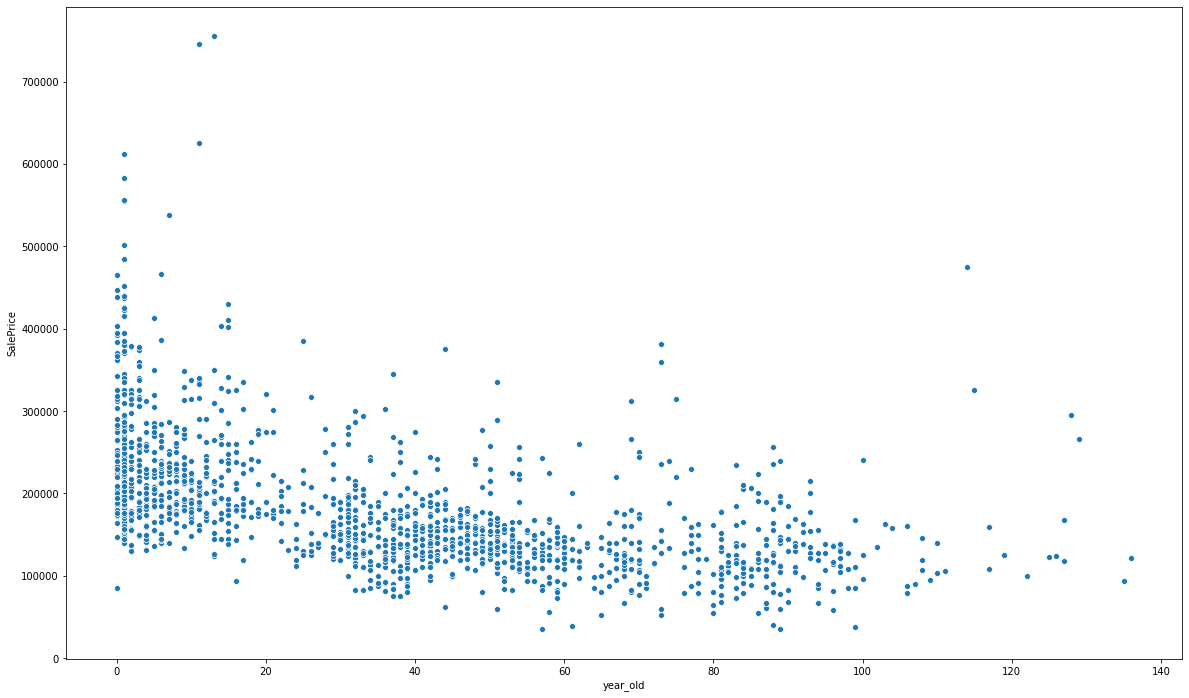

In [16]:
## 새로만든 feature가 y와 관련이 있을지 그래프 찍어보기.
plt.figure(figsize=(20,12))
sns.scatterplot(all_data['year_old'], all_data['SalePrice']) ## 집이 오래된것일수록 가격이 작아짐. 

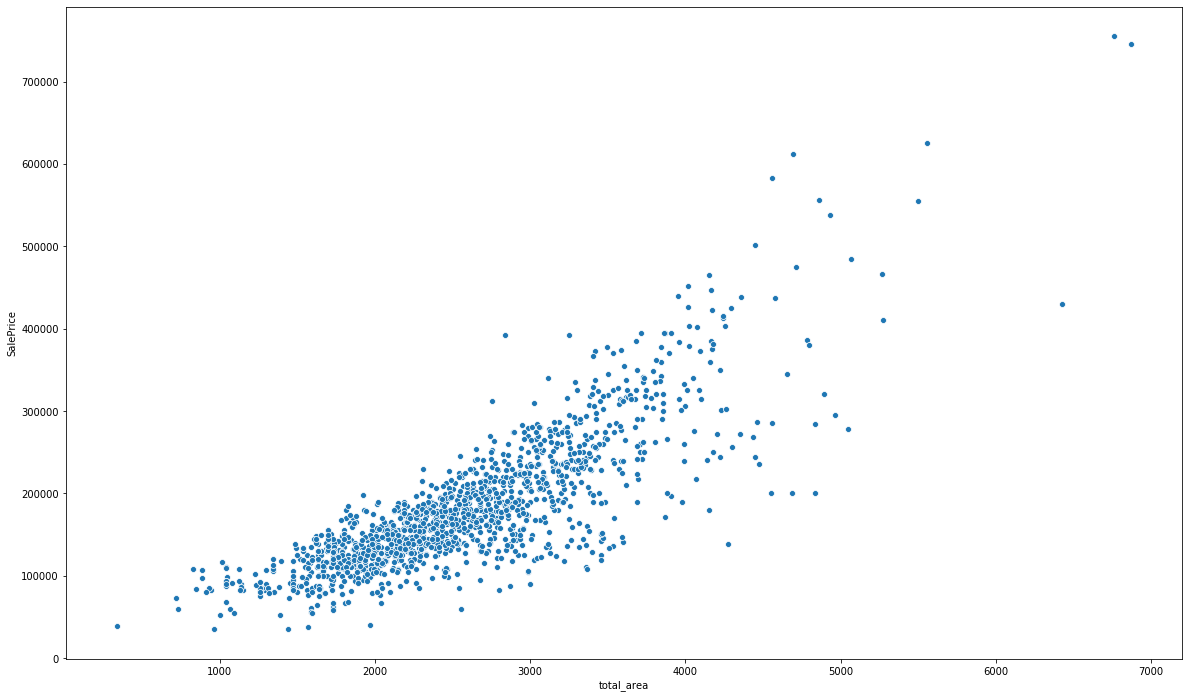

In [17]:
plt.figure(figsize=(20,12))
sns.scatterplot(all_data['total_area'], all_data['SalePrice'])

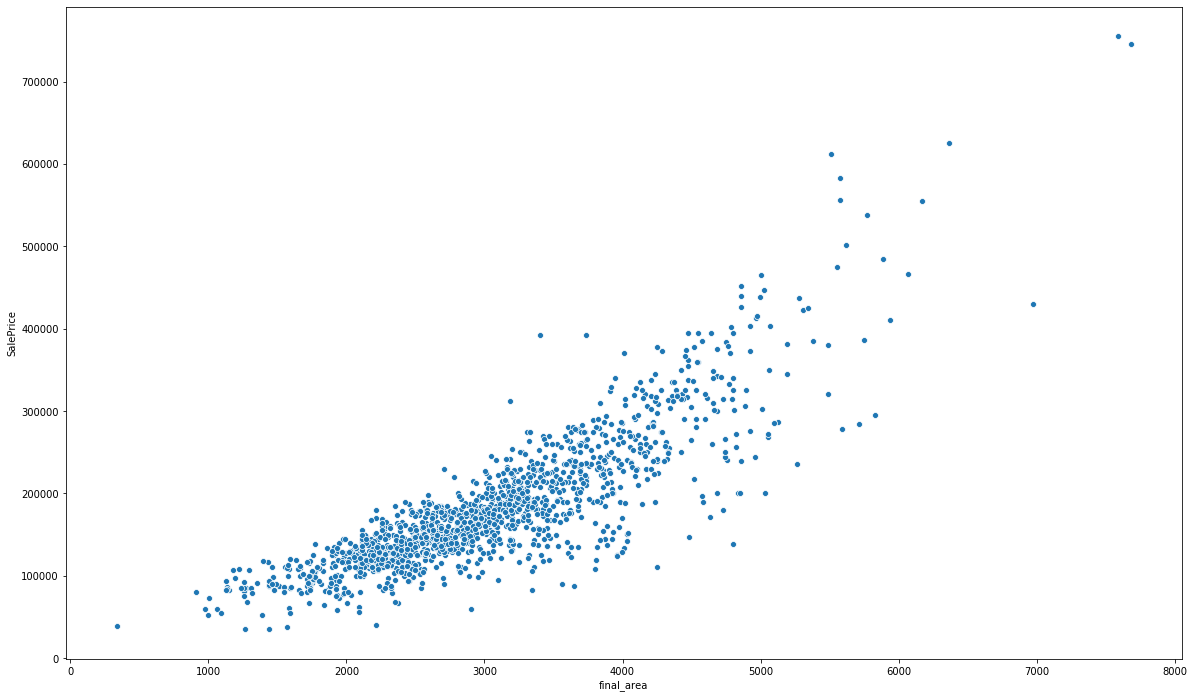

In [18]:
plt.figure(figsize=(20,12))
sns.scatterplot(all_data['final_area'], all_data['SalePrice'])

In [19]:
all_data.corr()['SalePrice'].sort_values(ascending=False)[:] ## 0.3보다 크면 선형성이 강한 것임. 트리모델은 선형성을 학습하기 힘듦.
## 선형모델을 쓴다면 범주형 데이터는 원 핫 인코딩으로 처리해야 한다. 
## 스케일링도 고려. 각 feautre의 스케일링이 다르면 스케일링 큰 feature를 중심으로 학습하게 된다.
## test데이터에는 SalePrice가 NaN으로 되어있는데 all_data로 corr을 구해도 되나? --> 됨. train만 가지고 corr()쓴거랑 같은 결과가 나온다. 다만 train은 원핫인코딩을 안해놔서 그 부분만 다름.

SalePrice         1.000000
final_area        0.854926
total_area        0.829116
OverallQual       0.796004
GrLivArea         0.734565
                    ...   
BsmtQual_TA      -0.452027
KitchenQual_TA   -0.519190
year_old         -0.523222
ExterQual_TA     -0.591411
MSSubClass_150         NaN
Name: SalePrice, Length: 313, dtype: float64

In [20]:
all_data ## 문자(object)형을 숫자로 바꾸기, nan지우기, ID칼럼 지우기 의미없음.

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_mean,year_old,total_area,final_area,area,overall_plus,overall_minus,area_mean,qual_mean,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,

In [21]:
all_data = all_data[all_data.columns[all_data.dtypes != 'object']] ## 숫자형 칼럼만 가져온다.all_data.columns[all_data.dtypes != 'object']은 숫자형 칼럼 목록이다.
all_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_mean,year_old,total_area,final_area,area,overall_plus,overall_minus,area_mean,qual_mean,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,

In [22]:
all_data.isna().sum() 

Id                         0
LotFrontage              485
LotArea                    0
OverallQual                0
OverallCond                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 313, dtype: int64

In [23]:
## nan을 평균이나 중앙값으로 채우면 위험하다. 해당 nan이 있는 데이터가 중요할 경우 평균값도 중요해질 수 있다. 그럼 다른 평균값을 가진 데이터도 중요해짐. 왜곡 된다.
## 데이터 안에 없는값, -1같은 값을 넣어서 결측치임을 표시한다.

In [24]:
all_data = all_data.fillna(-1)
all_data

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_mean,year_old,total_area,final_area,area,overall_plus,overall_minus,area_mean,qual_mean,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,

In [25]:
all_data2 = all_data.drop(['Id', 'SalePrice'], axis = 1)
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# ss = StandardScaler()
rs = RobustScaler() ## 데이터를 보면 outlier가 많은 feture가 많다. 그러므로 standard말고 robust를 쓴다.robust는 mean대신 median을 쓰기 때문에 outlier의 영향을 줄여줌.

all_data2 = rs.fit_transform(all_data2) ## 원핫인코딩한 칼럼도 정규화로 스케일링 되지만 상관없다. 어차피 값이 2개로만 표현되기 때문.
all_data2

array([[ 0.05714286, -0.2455042 ,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.48571429,  0.03682563,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.14285714,  0.44190757,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 2.77142857,  2.59006935, -0.5       , ...,  0.        ,
        -1.        ,  0.        ],
       [-0.02857143,  0.24329467, -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31428571,  0.04345424,  0.5       , ...,  0.        ,
         0.        ,  0.        ]])

In [26]:
all_data2[0]

array([ 0.05714286, -0.2455042 ,  0.5       ,  0.        ,  0.62827225,
        0.25641026,  1.20430108,  0.46127602,  0.        , -0.54397254,
       -0.25920471, -0.44510094,  1.21306818,  0.        ,  0.43273906,
        1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        , -1.        ,  0.59090909,  0.        ,
        0.26953125,  0.        ,  0.5       ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -1.        ,  0.        ,
        0.        , -0.62827225,  0.11509339,  0.17583351,  0.06882134,
        0.25      ,  0.53846154,  0.18819512,  0.47568647,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

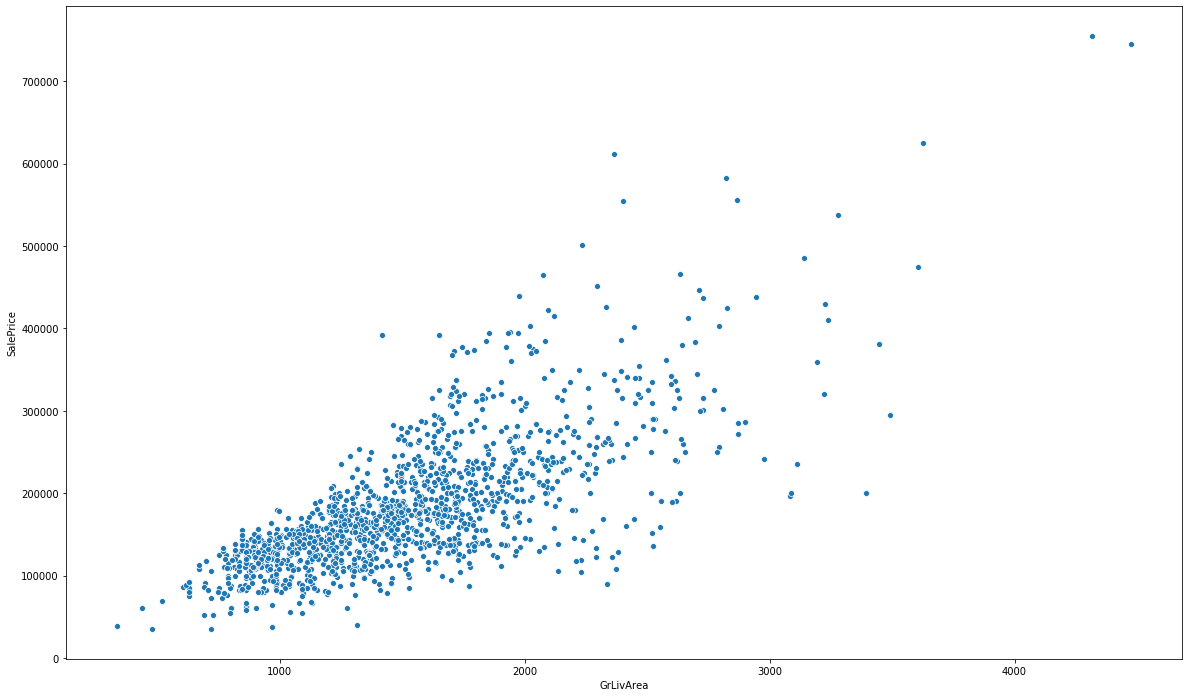

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.scatterplot(train['GrLivArea'], train['SalePrice'])

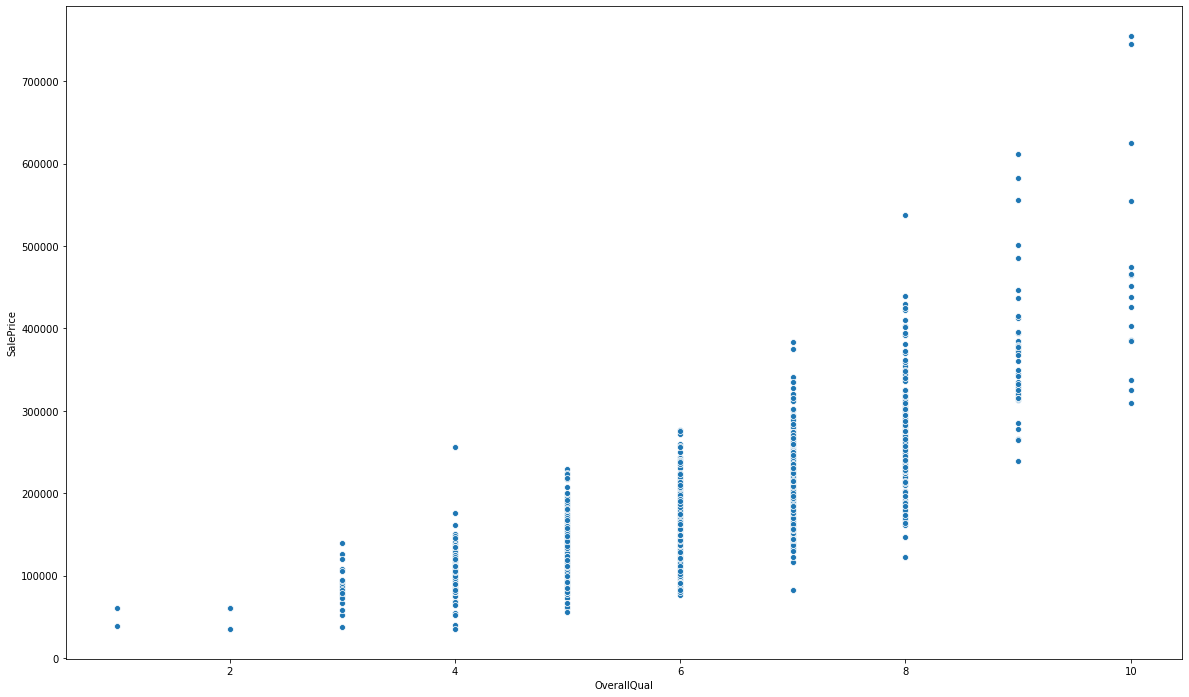

In [28]:
plt.figure(figsize=(20,12))
sns.scatterplot(train['OverallQual'], train['SalePrice']) ## 맨 오른쪽에 아웃라이어가 보임. 맨위로 가서 train 불러오고나서 제거해주는 코드 짜기.
## 트리는 IG를 이용해서 중요한 feature를 알아서 찾아낸다.
## 선형모델은 중요한 feature가 뭔지 알아서 알지는 못한다. correlation이 큰 feature에 가중치를 많이준다.
## 그러나 outlier때문에 correlation이 실제보다 작을 수 있다. 그래서 outlier를 제거안해주면 중요한 feature를 덜 중요하게 생각할 수 있고
## 중요치 않은 것을 덜 중요치 않게 볼 수 있다.
## 트리는 따로 노드만들어서 outlier를 거기로 보내기 때문에 어느정도 알아서 처리 해줌. 다만, 트리 깊이가 제한되어 있다면 outlier는 제거해줘야 할 듯.

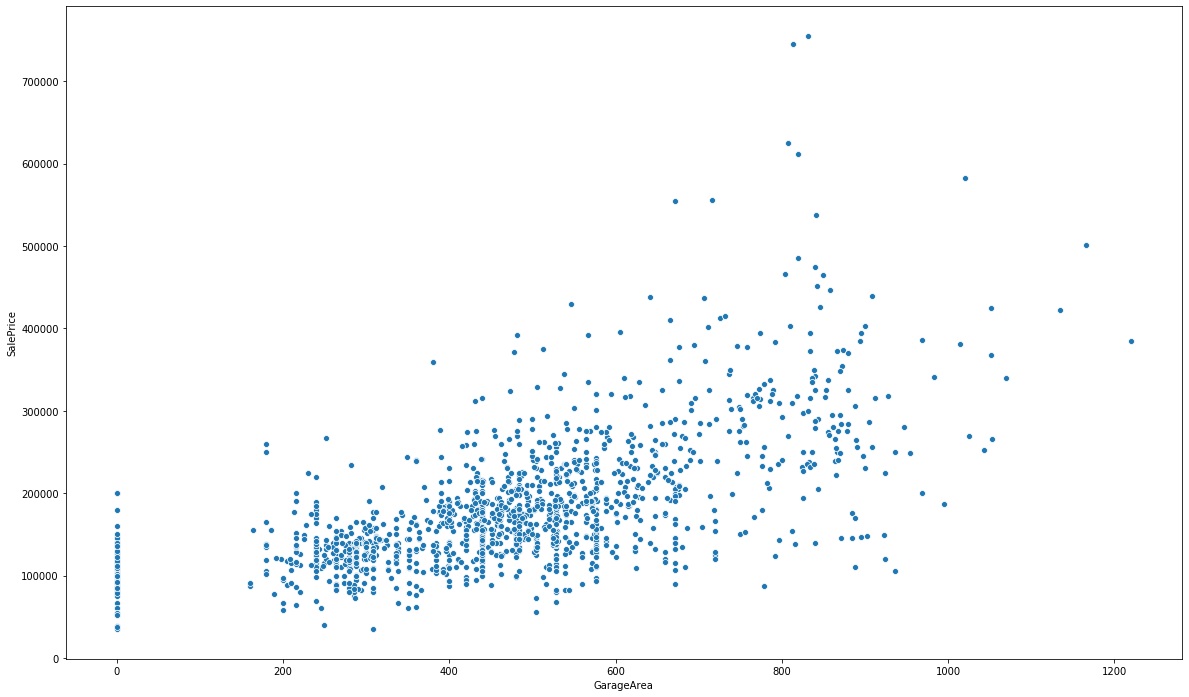

In [29]:

plt.figure(figsize=(20,12))
sns.scatterplot(train['GarageArea'], train['SalePrice'])

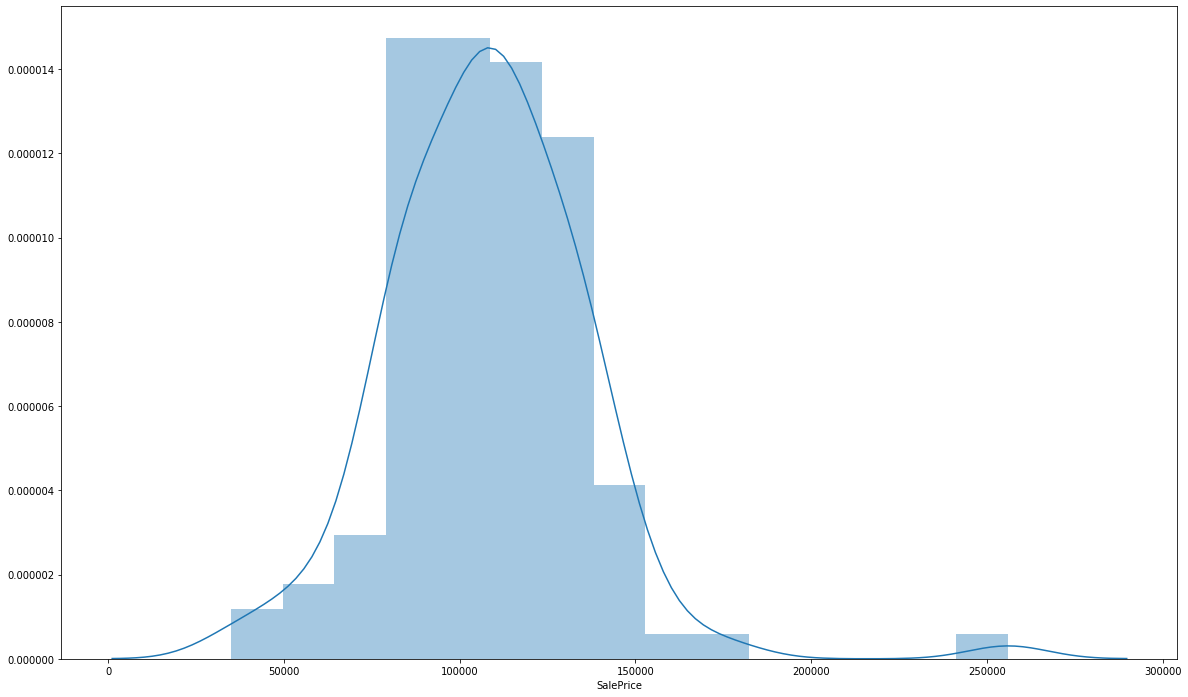

In [30]:
plt.figure(figsize=(20,12))
sns.distplot(train[train['OverallQual'] == 4]['SalePrice'])

In [31]:
train2 = all_data2[:len(train)]
test2 = all_data2[len(train):]

In [32]:
# from sklearn.model_selection import train_test_split
# X_train, X_valid, Y_train, Y_valid = train_test_split(train2,train['SalePrice'], test_size = 0.2, random_state = 10)
## ridge는 l2규제, lasso는 l1규제, elasticnet은 l1,l2규제. l2는 도움이 안되는 칼럼의 가중치를 조금주고 l1은 아예 없애버린다. 가중치를 조금주든 아예없애든 별 차이는 없음.
## 그래서 선형모델은 뭘 쓰든 큰차이 없다.
## 여기서는 선형모델을 썻는데 데이터를 보면 범주형도 많다. 범주형이 많으므로 트리가 이 부분을 잘 학습할 수 있지만 범주형이 아닌 것은 선형모델만큼 잘 학습하진 못한다. 그래서
## 트리와 선형모델을 앙상블 해서 쓰는 방법도 있다.
from sklearn.linear_model import Ridge
# ridge = Ridge(alpha = 10) ## alpha로 규제를 준다.
# ridge.fit(X_train, Y_train)
# result = ridge.predict(X_valid) ## 데이터 자체가 너무 적으므로 크로스 발리데이션으로 한다.
# from sklearn.metrics import mean_squared_error
# np.sqrt(mean_squared_error(Y_valid, result))


## 이런식으로 내부에서 자체적으로 점수를 계산해보고 향상이 되는 것 같으면 제출해본다.
from sklearn.model_selection import cross_val_score
# for i in [10,20,50,100,200,300,500,700,1000]: ## 1000은 잘 안넘긴다.
for i in [8, 9 ,10, 11, 12, 13]: ## robust scaler로 하면 outlier를 잘 잡아주기 떄문에 규제를 작게 해주는게 더 좋아진다.
    ridge = Ridge(alpha = i)
    print(np.sqrt(-cross_val_score(ridge, train2, train['SalePrice'], n_jobs=-1, cv = 10, scoring = 'neg_mean_squared_error').mean())) ## score가 가장 높은것을 좋다고 하기때문에 neg_를 붙인다.

24012.662748615345
23984.3884425619
23962.19741694199
23944.787882270495
23931.223012225324
23920.807251412964


In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 13) ## alpha로 규제를 준다. 원래는 700으로 했는데 outlier를 지우고 나서는 200으로 바꾼다.
# train['SalePrice'] = np.log(train['SalePrice'])
ridge.fit(train2, np.log(train['SalePrice']))
## cross validation할때는 log를 안씌웠지만 별로 상관 없다. cv할때 log 씌워도 되고 안씌워도 됨. log씌우면 점수는 다르게 나오겠지만 파라미터에 따른 점수 순서는 같다.
result = ridge.predict(test2)

In [34]:
from catboost import CatBoostRegressor ## catboost는 카테고리형 칼럼을 잘 처리한다. 카테고리형이 많을때는 catboost를 쓴다.
cat = CatBoostRegressor(iterations = 4000) ## iterations를 크게하면 learning late가 알아서 낮아진다.

cat.fit(train2, np.log(train['SalePrice']))
result2 = cat.predict(test2)

Learning rate set to 0.014549
0:	learn: 0.3955722	total: 51.3ms	remaining: 3m 25s
1:	learn: 0.3916564	total: 58.2ms	remaining: 1m 56s
2:	learn: 0.3877057	total: 71.5ms	remaining: 1m 35s
3:	learn: 0.3839300	total: 79.1ms	remaining: 1m 19s
4:	learn: 0.3802310	total: 86.2ms	remaining: 1m 8s
5:	learn: 0.3763324	total: 93.4ms	remaining: 1m 2s
6:	learn: 0.3728098	total: 100ms	remaining: 57.3s
7:	learn: 0.3694394	total: 107ms	remaining: 53.6s
8:	learn: 0.3657555	total: 114ms	remaining: 50.6s
9:	learn: 0.3622267	total: 119ms	remaining: 47.7s
10:	learn: 0.3588272	total: 125ms	remaining: 45.3s
11:	learn: 0.3555754	total: 130ms	remaining: 43.2s
12:	learn: 0.3522799	total: 137ms	remaining: 42.1s
13:	learn: 0.3488225	total: 144ms	remaining: 41s
14:	learn: 0.3454615	total: 152ms	remaining: 40.5s
15:	learn: 0.3422282	total: 158ms	remaining: 39.5s
16:	learn: 0.3391121	total: 164ms	remaining: 38.4s
17:	learn: 0.3359742	total: 169ms	remaining: 37.4s
18:	learn: 0.3328806	total: 174ms	remaining: 36.5s
19:

169:	learn: 0.1365878	total: 1.01s	remaining: 22.7s
170:	learn: 0.1362110	total: 1.01s	remaining: 22.7s
171:	learn: 0.1357772	total: 1.02s	remaining: 22.8s
172:	learn: 0.1353809	total: 1.03s	remaining: 22.8s
173:	learn: 0.1349782	total: 1.03s	remaining: 22.8s
174:	learn: 0.1346055	total: 1.04s	remaining: 22.8s
175:	learn: 0.1342676	total: 1.05s	remaining: 22.8s
176:	learn: 0.1338826	total: 1.05s	remaining: 22.8s
177:	learn: 0.1335283	total: 1.06s	remaining: 22.8s
178:	learn: 0.1332224	total: 1.07s	remaining: 22.8s
179:	learn: 0.1328617	total: 1.07s	remaining: 22.8s
180:	learn: 0.1325150	total: 1.08s	remaining: 22.8s
181:	learn: 0.1321604	total: 1.09s	remaining: 22.8s
182:	learn: 0.1318360	total: 1.09s	remaining: 22.8s
183:	learn: 0.1314979	total: 1.1s	remaining: 22.8s
184:	learn: 0.1311651	total: 1.1s	remaining: 22.8s
185:	learn: 0.1308847	total: 1.11s	remaining: 22.8s
186:	learn: 0.1305963	total: 1.12s	remaining: 22.8s
187:	learn: 0.1302660	total: 1.12s	remaining: 22.8s
188:	learn: 0.

329:	learn: 0.1056562	total: 1.88s	remaining: 20.9s
330:	learn: 0.1055496	total: 1.89s	remaining: 20.9s
331:	learn: 0.1054714	total: 1.89s	remaining: 20.9s
332:	learn: 0.1053817	total: 1.9s	remaining: 20.9s
333:	learn: 0.1052979	total: 1.91s	remaining: 20.9s
334:	learn: 0.1052037	total: 1.91s	remaining: 20.9s
335:	learn: 0.1051283	total: 1.92s	remaining: 20.9s
336:	learn: 0.1050298	total: 1.92s	remaining: 20.9s
337:	learn: 0.1049463	total: 1.93s	remaining: 20.9s
338:	learn: 0.1048499	total: 1.93s	remaining: 20.9s
339:	learn: 0.1047465	total: 1.94s	remaining: 20.8s
340:	learn: 0.1046668	total: 1.94s	remaining: 20.8s
341:	learn: 0.1045752	total: 1.95s	remaining: 20.8s
342:	learn: 0.1045005	total: 1.95s	remaining: 20.8s
343:	learn: 0.1044274	total: 1.96s	remaining: 20.8s
344:	learn: 0.1043383	total: 1.96s	remaining: 20.8s
345:	learn: 0.1042508	total: 1.97s	remaining: 20.8s
346:	learn: 0.1041644	total: 1.97s	remaining: 20.8s
347:	learn: 0.1040552	total: 1.98s	remaining: 20.7s
348:	learn: 0

489:	learn: 0.0941594	total: 2.76s	remaining: 19.7s
490:	learn: 0.0940880	total: 2.76s	remaining: 19.7s
491:	learn: 0.0940224	total: 2.77s	remaining: 19.7s
492:	learn: 0.0939854	total: 2.77s	remaining: 19.7s
493:	learn: 0.0939149	total: 2.78s	remaining: 19.7s
494:	learn: 0.0938480	total: 2.78s	remaining: 19.7s
495:	learn: 0.0937892	total: 2.79s	remaining: 19.7s
496:	learn: 0.0937389	total: 2.79s	remaining: 19.7s
497:	learn: 0.0936929	total: 2.8s	remaining: 19.7s
498:	learn: 0.0936349	total: 2.8s	remaining: 19.7s
499:	learn: 0.0935854	total: 2.81s	remaining: 19.7s
500:	learn: 0.0935137	total: 2.81s	remaining: 19.7s
501:	learn: 0.0934564	total: 2.82s	remaining: 19.6s
502:	learn: 0.0934015	total: 2.82s	remaining: 19.6s
503:	learn: 0.0933244	total: 2.83s	remaining: 19.6s
504:	learn: 0.0932524	total: 2.83s	remaining: 19.6s
505:	learn: 0.0931983	total: 2.84s	remaining: 19.6s
506:	learn: 0.0931423	total: 2.84s	remaining: 19.6s
507:	learn: 0.0930594	total: 2.85s	remaining: 19.6s
508:	learn: 0.

653:	learn: 0.0851031	total: 3.63s	remaining: 18.6s
654:	learn: 0.0850287	total: 3.63s	remaining: 18.6s
655:	learn: 0.0849733	total: 3.64s	remaining: 18.6s
656:	learn: 0.0849139	total: 3.65s	remaining: 18.6s
657:	learn: 0.0848523	total: 3.65s	remaining: 18.5s
658:	learn: 0.0848113	total: 3.66s	remaining: 18.5s
659:	learn: 0.0847974	total: 3.66s	remaining: 18.5s
660:	learn: 0.0847358	total: 3.67s	remaining: 18.5s
661:	learn: 0.0846663	total: 3.67s	remaining: 18.5s
662:	learn: 0.0846019	total: 3.68s	remaining: 18.5s
663:	learn: 0.0845884	total: 3.68s	remaining: 18.5s
664:	learn: 0.0845624	total: 3.69s	remaining: 18.5s
665:	learn: 0.0844930	total: 3.69s	remaining: 18.5s
666:	learn: 0.0844381	total: 3.7s	remaining: 18.5s
667:	learn: 0.0843714	total: 3.7s	remaining: 18.5s
668:	learn: 0.0843047	total: 3.71s	remaining: 18.5s
669:	learn: 0.0842654	total: 3.71s	remaining: 18.4s
670:	learn: 0.0842460	total: 3.72s	remaining: 18.4s
671:	learn: 0.0841792	total: 3.72s	remaining: 18.4s
672:	learn: 0.

828:	learn: 0.0778253	total: 4.7s	remaining: 18s
829:	learn: 0.0778172	total: 4.7s	remaining: 18s
830:	learn: 0.0777757	total: 4.71s	remaining: 18s
831:	learn: 0.0777363	total: 4.72s	remaining: 18s
832:	learn: 0.0777304	total: 4.72s	remaining: 18s
833:	learn: 0.0777228	total: 4.73s	remaining: 18s
834:	learn: 0.0776750	total: 4.74s	remaining: 18s
835:	learn: 0.0776342	total: 4.75s	remaining: 18s
836:	learn: 0.0775915	total: 4.76s	remaining: 18s
837:	learn: 0.0775479	total: 4.77s	remaining: 18s
838:	learn: 0.0775097	total: 4.78s	remaining: 18s
839:	learn: 0.0774622	total: 4.78s	remaining: 18s
840:	learn: 0.0774052	total: 4.8s	remaining: 18s
841:	learn: 0.0773988	total: 4.8s	remaining: 18s
842:	learn: 0.0773485	total: 4.81s	remaining: 18s
843:	learn: 0.0773145	total: 4.82s	remaining: 18s
844:	learn: 0.0772767	total: 4.83s	remaining: 18s
845:	learn: 0.0772337	total: 4.83s	remaining: 18s
846:	learn: 0.0771747	total: 4.84s	remaining: 18s
847:	learn: 0.0771553	total: 4.85s	remaining: 18s
848:

989:	learn: 0.0725319	total: 5.75s	remaining: 17.5s
990:	learn: 0.0725026	total: 5.75s	remaining: 17.5s
991:	learn: 0.0724641	total: 5.76s	remaining: 17.5s
992:	learn: 0.0724438	total: 5.77s	remaining: 17.5s
993:	learn: 0.0724014	total: 5.77s	remaining: 17.5s
994:	learn: 0.0723719	total: 5.78s	remaining: 17.5s
995:	learn: 0.0723284	total: 5.79s	remaining: 17.5s
996:	learn: 0.0722973	total: 5.79s	remaining: 17.4s
997:	learn: 0.0722538	total: 5.8s	remaining: 17.5s
998:	learn: 0.0722256	total: 5.81s	remaining: 17.4s
999:	learn: 0.0721841	total: 5.81s	remaining: 17.4s
1000:	learn: 0.0721460	total: 5.82s	remaining: 17.4s
1001:	learn: 0.0721190	total: 5.83s	remaining: 17.4s
1002:	learn: 0.0720912	total: 5.83s	remaining: 17.4s
1003:	learn: 0.0720873	total: 5.83s	remaining: 17.4s
1004:	learn: 0.0720416	total: 5.84s	remaining: 17.4s
1005:	learn: 0.0720256	total: 5.85s	remaining: 17.4s
1006:	learn: 0.0719902	total: 5.86s	remaining: 17.4s
1007:	learn: 0.0719740	total: 5.86s	remaining: 17.4s
1008:

1146:	learn: 0.0674320	total: 6.62s	remaining: 16.5s
1147:	learn: 0.0674086	total: 6.63s	remaining: 16.5s
1148:	learn: 0.0674046	total: 6.63s	remaining: 16.5s
1149:	learn: 0.0673628	total: 6.64s	remaining: 16.5s
1150:	learn: 0.0673361	total: 6.64s	remaining: 16.4s
1151:	learn: 0.0673151	total: 6.65s	remaining: 16.4s
1152:	learn: 0.0672853	total: 6.65s	remaining: 16.4s
1153:	learn: 0.0672514	total: 6.66s	remaining: 16.4s
1154:	learn: 0.0672257	total: 6.66s	remaining: 16.4s
1155:	learn: 0.0671999	total: 6.67s	remaining: 16.4s
1156:	learn: 0.0671808	total: 6.67s	remaining: 16.4s
1157:	learn: 0.0671535	total: 6.68s	remaining: 16.4s
1158:	learn: 0.0671328	total: 6.68s	remaining: 16.4s
1159:	learn: 0.0671038	total: 6.69s	remaining: 16.4s
1160:	learn: 0.0670789	total: 6.69s	remaining: 16.4s
1161:	learn: 0.0670354	total: 6.7s	remaining: 16.4s
1162:	learn: 0.0670067	total: 6.7s	remaining: 16.4s
1163:	learn: 0.0669703	total: 6.71s	remaining: 16.3s
1164:	learn: 0.0669374	total: 6.71s	remaining: 1

1304:	learn: 0.0631979	total: 7.49s	remaining: 15.5s
1305:	learn: 0.0631751	total: 7.5s	remaining: 15.5s
1306:	learn: 0.0631405	total: 7.51s	remaining: 15.5s
1307:	learn: 0.0631035	total: 7.51s	remaining: 15.5s
1308:	learn: 0.0630893	total: 7.52s	remaining: 15.5s
1309:	learn: 0.0630860	total: 7.52s	remaining: 15.4s
1310:	learn: 0.0630803	total: 7.53s	remaining: 15.4s
1311:	learn: 0.0630500	total: 7.53s	remaining: 15.4s
1312:	learn: 0.0630469	total: 7.54s	remaining: 15.4s
1313:	learn: 0.0630195	total: 7.54s	remaining: 15.4s
1314:	learn: 0.0629972	total: 7.55s	remaining: 15.4s
1315:	learn: 0.0629712	total: 7.55s	remaining: 15.4s
1316:	learn: 0.0629596	total: 7.56s	remaining: 15.4s
1317:	learn: 0.0629393	total: 7.56s	remaining: 15.4s
1318:	learn: 0.0629367	total: 7.57s	remaining: 15.4s
1319:	learn: 0.0629005	total: 7.57s	remaining: 15.4s
1320:	learn: 0.0628869	total: 7.58s	remaining: 15.4s
1321:	learn: 0.0628503	total: 7.58s	remaining: 15.4s
1322:	learn: 0.0628262	total: 7.59s	remaining: 

1465:	learn: 0.0593918	total: 8.37s	remaining: 14.5s
1466:	learn: 0.0593805	total: 8.38s	remaining: 14.5s
1467:	learn: 0.0593460	total: 8.38s	remaining: 14.5s
1468:	learn: 0.0593070	total: 8.39s	remaining: 14.5s
1469:	learn: 0.0592705	total: 8.39s	remaining: 14.4s
1470:	learn: 0.0592401	total: 8.4s	remaining: 14.4s
1471:	learn: 0.0592212	total: 8.4s	remaining: 14.4s
1472:	learn: 0.0592104	total: 8.41s	remaining: 14.4s
1473:	learn: 0.0591988	total: 8.41s	remaining: 14.4s
1474:	learn: 0.0591755	total: 8.42s	remaining: 14.4s
1475:	learn: 0.0591512	total: 8.43s	remaining: 14.4s
1476:	learn: 0.0591244	total: 8.43s	remaining: 14.4s
1477:	learn: 0.0590985	total: 8.44s	remaining: 14.4s
1478:	learn: 0.0590873	total: 8.44s	remaining: 14.4s
1479:	learn: 0.0590623	total: 8.45s	remaining: 14.4s
1480:	learn: 0.0590415	total: 8.45s	remaining: 14.4s
1481:	learn: 0.0590146	total: 8.46s	remaining: 14.4s
1482:	learn: 0.0589991	total: 8.46s	remaining: 14.4s
1483:	learn: 0.0589704	total: 8.47s	remaining: 1

1625:	learn: 0.0560543	total: 9.26s	remaining: 13.5s
1626:	learn: 0.0560290	total: 9.27s	remaining: 13.5s
1627:	learn: 0.0560024	total: 9.27s	remaining: 13.5s
1628:	learn: 0.0559846	total: 9.28s	remaining: 13.5s
1629:	learn: 0.0559484	total: 9.28s	remaining: 13.5s
1630:	learn: 0.0559186	total: 9.29s	remaining: 13.5s
1631:	learn: 0.0558918	total: 9.29s	remaining: 13.5s
1632:	learn: 0.0558706	total: 9.3s	remaining: 13.5s
1633:	learn: 0.0558434	total: 9.3s	remaining: 13.5s
1634:	learn: 0.0558255	total: 9.31s	remaining: 13.5s
1635:	learn: 0.0558103	total: 9.31s	remaining: 13.5s
1636:	learn: 0.0557969	total: 9.32s	remaining: 13.4s
1637:	learn: 0.0557743	total: 9.32s	remaining: 13.4s
1638:	learn: 0.0557518	total: 9.33s	remaining: 13.4s
1639:	learn: 0.0557334	total: 9.33s	remaining: 13.4s
1640:	learn: 0.0556997	total: 9.34s	remaining: 13.4s
1641:	learn: 0.0556761	total: 9.34s	remaining: 13.4s
1642:	learn: 0.0556497	total: 9.35s	remaining: 13.4s
1643:	learn: 0.0556438	total: 9.36s	remaining: 1

1785:	learn: 0.0526953	total: 10.1s	remaining: 12.6s
1786:	learn: 0.0526568	total: 10.1s	remaining: 12.6s
1787:	learn: 0.0526540	total: 10.1s	remaining: 12.6s
1788:	learn: 0.0526332	total: 10.2s	remaining: 12.5s
1789:	learn: 0.0526202	total: 10.2s	remaining: 12.5s
1790:	learn: 0.0525934	total: 10.2s	remaining: 12.5s
1791:	learn: 0.0525752	total: 10.2s	remaining: 12.5s
1792:	learn: 0.0525610	total: 10.2s	remaining: 12.5s
1793:	learn: 0.0525578	total: 10.2s	remaining: 12.5s
1794:	learn: 0.0525259	total: 10.2s	remaining: 12.5s
1795:	learn: 0.0525156	total: 10.2s	remaining: 12.5s
1796:	learn: 0.0525038	total: 10.2s	remaining: 12.5s
1797:	learn: 0.0525006	total: 10.2s	remaining: 12.5s
1798:	learn: 0.0524810	total: 10.2s	remaining: 12.5s
1799:	learn: 0.0524582	total: 10.2s	remaining: 12.5s
1800:	learn: 0.0524425	total: 10.2s	remaining: 12.5s
1801:	learn: 0.0524181	total: 10.2s	remaining: 12.5s
1802:	learn: 0.0523928	total: 10.2s	remaining: 12.5s
1803:	learn: 0.0523782	total: 10.2s	remaining:

1959:	learn: 0.0497785	total: 11.2s	remaining: 11.7s
1960:	learn: 0.0497638	total: 11.2s	remaining: 11.7s
1961:	learn: 0.0497432	total: 11.2s	remaining: 11.7s
1962:	learn: 0.0497268	total: 11.2s	remaining: 11.6s
1963:	learn: 0.0497153	total: 11.2s	remaining: 11.6s
1964:	learn: 0.0497120	total: 11.2s	remaining: 11.6s
1965:	learn: 0.0496908	total: 11.2s	remaining: 11.6s
1966:	learn: 0.0496641	total: 11.3s	remaining: 11.6s
1967:	learn: 0.0496559	total: 11.3s	remaining: 11.6s
1968:	learn: 0.0496259	total: 11.3s	remaining: 11.6s
1969:	learn: 0.0496016	total: 11.3s	remaining: 11.6s
1970:	learn: 0.0495767	total: 11.3s	remaining: 11.6s
1971:	learn: 0.0495615	total: 11.3s	remaining: 11.6s
1972:	learn: 0.0495383	total: 11.3s	remaining: 11.6s
1973:	learn: 0.0495216	total: 11.3s	remaining: 11.6s
1974:	learn: 0.0495085	total: 11.3s	remaining: 11.6s
1975:	learn: 0.0495068	total: 11.3s	remaining: 11.6s
1976:	learn: 0.0494856	total: 11.3s	remaining: 11.6s
1977:	learn: 0.0494834	total: 11.3s	remaining:

2121:	learn: 0.0470569	total: 12.1s	remaining: 10.7s
2122:	learn: 0.0470543	total: 12.1s	remaining: 10.7s
2123:	learn: 0.0470340	total: 12.1s	remaining: 10.7s
2124:	learn: 0.0470194	total: 12.1s	remaining: 10.7s
2125:	learn: 0.0470063	total: 12.1s	remaining: 10.7s
2126:	learn: 0.0469890	total: 12.1s	remaining: 10.7s
2127:	learn: 0.0469688	total: 12.1s	remaining: 10.7s
2128:	learn: 0.0469520	total: 12.1s	remaining: 10.7s
2129:	learn: 0.0469494	total: 12.1s	remaining: 10.6s
2130:	learn: 0.0469393	total: 12.1s	remaining: 10.6s
2131:	learn: 0.0469148	total: 12.1s	remaining: 10.6s
2132:	learn: 0.0468932	total: 12.1s	remaining: 10.6s
2133:	learn: 0.0468710	total: 12.1s	remaining: 10.6s
2134:	learn: 0.0468610	total: 12.2s	remaining: 10.6s
2135:	learn: 0.0468363	total: 12.2s	remaining: 10.6s
2136:	learn: 0.0468181	total: 12.2s	remaining: 10.6s
2137:	learn: 0.0468169	total: 12.2s	remaining: 10.6s
2138:	learn: 0.0468063	total: 12.2s	remaining: 10.6s
2139:	learn: 0.0467849	total: 12.2s	remaining:

2285:	learn: 0.0447267	total: 13s	remaining: 9.71s
2286:	learn: 0.0447204	total: 13s	remaining: 9.71s
2287:	learn: 0.0446966	total: 13s	remaining: 9.71s
2288:	learn: 0.0446759	total: 13s	remaining: 9.7s
2289:	learn: 0.0446747	total: 13s	remaining: 9.69s
2290:	learn: 0.0446621	total: 13s	remaining: 9.69s
2291:	learn: 0.0446458	total: 13s	remaining: 9.68s
2292:	learn: 0.0446318	total: 13s	remaining: 9.67s
2293:	learn: 0.0446184	total: 13s	remaining: 9.67s
2294:	learn: 0.0445986	total: 13s	remaining: 9.66s
2295:	learn: 0.0445885	total: 13s	remaining: 9.66s
2296:	learn: 0.0445865	total: 13s	remaining: 9.65s
2297:	learn: 0.0445712	total: 13s	remaining: 9.64s
2298:	learn: 0.0445587	total: 13s	remaining: 9.64s
2299:	learn: 0.0445389	total: 13s	remaining: 9.63s
2300:	learn: 0.0445231	total: 13s	remaining: 9.63s
2301:	learn: 0.0445096	total: 13s	remaining: 9.62s
2302:	learn: 0.0444948	total: 13s	remaining: 9.61s
2303:	learn: 0.0444854	total: 13.1s	remaining: 9.61s
2304:	learn: 0.0444832	total: 

2446:	learn: 0.0427381	total: 13.8s	remaining: 8.78s
2447:	learn: 0.0427235	total: 13.8s	remaining: 8.78s
2448:	learn: 0.0427064	total: 13.8s	remaining: 8.77s
2449:	learn: 0.0426994	total: 13.9s	remaining: 8.77s
2450:	learn: 0.0426891	total: 13.9s	remaining: 8.76s
2451:	learn: 0.0426774	total: 13.9s	remaining: 8.75s
2452:	learn: 0.0426574	total: 13.9s	remaining: 8.75s
2453:	learn: 0.0426361	total: 13.9s	remaining: 8.74s
2454:	learn: 0.0426190	total: 13.9s	remaining: 8.73s
2455:	learn: 0.0426177	total: 13.9s	remaining: 8.73s
2456:	learn: 0.0426030	total: 13.9s	remaining: 8.72s
2457:	learn: 0.0425915	total: 13.9s	remaining: 8.72s
2458:	learn: 0.0425899	total: 13.9s	remaining: 8.71s
2459:	learn: 0.0425704	total: 13.9s	remaining: 8.71s
2460:	learn: 0.0425579	total: 13.9s	remaining: 8.7s
2461:	learn: 0.0425407	total: 13.9s	remaining: 8.69s
2462:	learn: 0.0425272	total: 13.9s	remaining: 8.69s
2463:	learn: 0.0425000	total: 13.9s	remaining: 8.68s
2464:	learn: 0.0424866	total: 13.9s	remaining: 

2625:	learn: 0.0404040	total: 14.9s	remaining: 7.79s
2626:	learn: 0.0403980	total: 14.9s	remaining: 7.78s
2627:	learn: 0.0403754	total: 14.9s	remaining: 7.78s
2628:	learn: 0.0403745	total: 14.9s	remaining: 7.77s
2629:	learn: 0.0403734	total: 14.9s	remaining: 7.76s
2630:	learn: 0.0403725	total: 14.9s	remaining: 7.76s
2631:	learn: 0.0403606	total: 14.9s	remaining: 7.75s
2632:	learn: 0.0403460	total: 14.9s	remaining: 7.75s
2633:	learn: 0.0403450	total: 14.9s	remaining: 7.74s
2634:	learn: 0.0403422	total: 14.9s	remaining: 7.73s
2635:	learn: 0.0403299	total: 14.9s	remaining: 7.73s
2636:	learn: 0.0403183	total: 14.9s	remaining: 7.72s
2637:	learn: 0.0403173	total: 14.9s	remaining: 7.72s
2638:	learn: 0.0402986	total: 14.9s	remaining: 7.71s
2639:	learn: 0.0402879	total: 15s	remaining: 7.7s
2640:	learn: 0.0402748	total: 15s	remaining: 7.7s
2641:	learn: 0.0402700	total: 15s	remaining: 7.69s
2642:	learn: 0.0402587	total: 15s	remaining: 7.69s
2643:	learn: 0.0402338	total: 15s	remaining: 7.68s
2644:

2784:	learn: 0.0385672	total: 15.8s	remaining: 6.87s
2785:	learn: 0.0385612	total: 15.8s	remaining: 6.87s
2786:	learn: 0.0385439	total: 15.8s	remaining: 6.86s
2787:	learn: 0.0385250	total: 15.8s	remaining: 6.86s
2788:	learn: 0.0385157	total: 15.8s	remaining: 6.85s
2789:	learn: 0.0384992	total: 15.8s	remaining: 6.85s
2790:	learn: 0.0384897	total: 15.8s	remaining: 6.84s
2791:	learn: 0.0384690	total: 15.8s	remaining: 6.83s
2792:	learn: 0.0384665	total: 15.8s	remaining: 6.83s
2793:	learn: 0.0384447	total: 15.8s	remaining: 6.82s
2794:	learn: 0.0384424	total: 15.8s	remaining: 6.82s
2795:	learn: 0.0384355	total: 15.8s	remaining: 6.81s
2796:	learn: 0.0384267	total: 15.8s	remaining: 6.8s
2797:	learn: 0.0384104	total: 15.8s	remaining: 6.8s
2798:	learn: 0.0383989	total: 15.8s	remaining: 6.79s
2799:	learn: 0.0383908	total: 15.8s	remaining: 6.79s
2800:	learn: 0.0383736	total: 15.8s	remaining: 6.78s
2801:	learn: 0.0383663	total: 15.8s	remaining: 6.77s
2802:	learn: 0.0383656	total: 15.8s	remaining: 6

2970:	learn: 0.0365168	total: 16.8s	remaining: 5.82s
2971:	learn: 0.0365142	total: 16.8s	remaining: 5.82s
2972:	learn: 0.0364982	total: 16.8s	remaining: 5.81s
2973:	learn: 0.0364939	total: 16.8s	remaining: 5.8s
2974:	learn: 0.0364802	total: 16.8s	remaining: 5.8s
2975:	learn: 0.0364740	total: 16.8s	remaining: 5.79s
2976:	learn: 0.0364681	total: 16.8s	remaining: 5.79s
2977:	learn: 0.0364632	total: 16.8s	remaining: 5.78s
2978:	learn: 0.0364546	total: 16.8s	remaining: 5.77s
2979:	learn: 0.0364474	total: 16.9s	remaining: 5.77s
2980:	learn: 0.0364335	total: 16.9s	remaining: 5.76s
2981:	learn: 0.0364202	total: 16.9s	remaining: 5.76s
2982:	learn: 0.0364181	total: 16.9s	remaining: 5.75s
2983:	learn: 0.0363984	total: 16.9s	remaining: 5.75s
2984:	learn: 0.0363881	total: 16.9s	remaining: 5.74s
2985:	learn: 0.0363869	total: 16.9s	remaining: 5.73s
2986:	learn: 0.0363789	total: 16.9s	remaining: 5.73s
2987:	learn: 0.0363683	total: 16.9s	remaining: 5.72s
2988:	learn: 0.0363520	total: 16.9s	remaining: 5

3132:	learn: 0.0348880	total: 17.9s	remaining: 4.95s
3133:	learn: 0.0348792	total: 17.9s	remaining: 4.95s
3134:	learn: 0.0348733	total: 17.9s	remaining: 4.94s
3135:	learn: 0.0348632	total: 17.9s	remaining: 4.93s
3136:	learn: 0.0348532	total: 17.9s	remaining: 4.93s
3137:	learn: 0.0348450	total: 17.9s	remaining: 4.92s
3138:	learn: 0.0348296	total: 17.9s	remaining: 4.92s
3139:	learn: 0.0348176	total: 17.9s	remaining: 4.91s
3140:	learn: 0.0348143	total: 17.9s	remaining: 4.91s
3141:	learn: 0.0348056	total: 17.9s	remaining: 4.9s
3142:	learn: 0.0347946	total: 17.9s	remaining: 4.89s
3143:	learn: 0.0347862	total: 18s	remaining: 4.89s
3144:	learn: 0.0347770	total: 18s	remaining: 4.88s
3145:	learn: 0.0347549	total: 18s	remaining: 4.88s
3146:	learn: 0.0347383	total: 18s	remaining: 4.87s
3147:	learn: 0.0347314	total: 18s	remaining: 4.87s
3148:	learn: 0.0347162	total: 18s	remaining: 4.86s
3149:	learn: 0.0347120	total: 18s	remaining: 4.85s
3150:	learn: 0.0346911	total: 18s	remaining: 4.85s
3151:	lear

3314:	learn: 0.0330703	total: 18.9s	remaining: 3.92s
3315:	learn: 0.0330584	total: 19s	remaining: 3.91s
3316:	learn: 0.0330463	total: 19s	remaining: 3.9s
3317:	learn: 0.0330360	total: 19s	remaining: 3.9s
3318:	learn: 0.0330326	total: 19s	remaining: 3.89s
3319:	learn: 0.0330196	total: 19s	remaining: 3.89s
3320:	learn: 0.0330113	total: 19s	remaining: 3.88s
3321:	learn: 0.0329921	total: 19s	remaining: 3.88s
3322:	learn: 0.0329826	total: 19s	remaining: 3.87s
3323:	learn: 0.0329764	total: 19s	remaining: 3.86s
3324:	learn: 0.0329668	total: 19s	remaining: 3.86s
3325:	learn: 0.0329621	total: 19s	remaining: 3.85s
3326:	learn: 0.0329539	total: 19s	remaining: 3.85s
3327:	learn: 0.0329429	total: 19s	remaining: 3.84s
3328:	learn: 0.0329323	total: 19s	remaining: 3.83s
3329:	learn: 0.0329314	total: 19s	remaining: 3.83s
3330:	learn: 0.0329201	total: 19s	remaining: 3.82s
3331:	learn: 0.0329060	total: 19s	remaining: 3.82s
3332:	learn: 0.0329042	total: 19s	remaining: 3.81s
3333:	learn: 0.0328899	total: 1

3470:	learn: 0.0315718	total: 19.8s	remaining: 3.02s
3471:	learn: 0.0315575	total: 19.8s	remaining: 3.02s
3472:	learn: 0.0315465	total: 19.8s	remaining: 3.01s
3473:	learn: 0.0315368	total: 19.8s	remaining: 3s
3474:	learn: 0.0315229	total: 19.8s	remaining: 3s
3475:	learn: 0.0315123	total: 19.9s	remaining: 2.99s
3476:	learn: 0.0315047	total: 19.9s	remaining: 2.99s
3477:	learn: 0.0315025	total: 19.9s	remaining: 2.98s
3478:	learn: 0.0314933	total: 19.9s	remaining: 2.98s
3479:	learn: 0.0314816	total: 19.9s	remaining: 2.97s
3480:	learn: 0.0314639	total: 19.9s	remaining: 2.96s
3481:	learn: 0.0314518	total: 19.9s	remaining: 2.96s
3482:	learn: 0.0314473	total: 19.9s	remaining: 2.95s
3483:	learn: 0.0314351	total: 19.9s	remaining: 2.95s
3484:	learn: 0.0314224	total: 19.9s	remaining: 2.94s
3485:	learn: 0.0314124	total: 19.9s	remaining: 2.93s
3486:	learn: 0.0314023	total: 19.9s	remaining: 2.93s
3487:	learn: 0.0313990	total: 19.9s	remaining: 2.92s
3488:	learn: 0.0313888	total: 19.9s	remaining: 2.92s

3626:	learn: 0.0302648	total: 20.7s	remaining: 2.13s
3627:	learn: 0.0302563	total: 20.7s	remaining: 2.12s
3628:	learn: 0.0302508	total: 20.7s	remaining: 2.12s
3629:	learn: 0.0302414	total: 20.7s	remaining: 2.11s
3630:	learn: 0.0302303	total: 20.7s	remaining: 2.1s
3631:	learn: 0.0302146	total: 20.7s	remaining: 2.1s
3632:	learn: 0.0302075	total: 20.7s	remaining: 2.09s
3633:	learn: 0.0302054	total: 20.7s	remaining: 2.09s
3634:	learn: 0.0302011	total: 20.7s	remaining: 2.08s
3635:	learn: 0.0301915	total: 20.7s	remaining: 2.08s
3636:	learn: 0.0301834	total: 20.8s	remaining: 2.07s
3637:	learn: 0.0301717	total: 20.8s	remaining: 2.06s
3638:	learn: 0.0301637	total: 20.8s	remaining: 2.06s
3639:	learn: 0.0301500	total: 20.8s	remaining: 2.05s
3640:	learn: 0.0301461	total: 20.8s	remaining: 2.05s
3641:	learn: 0.0301397	total: 20.8s	remaining: 2.04s
3642:	learn: 0.0301328	total: 20.8s	remaining: 2.04s
3643:	learn: 0.0301275	total: 20.8s	remaining: 2.03s
3644:	learn: 0.0301235	total: 20.8s	remaining: 2

3788:	learn: 0.0289498	total: 21.6s	remaining: 1.2s
3789:	learn: 0.0289414	total: 21.6s	remaining: 1.2s
3790:	learn: 0.0289320	total: 21.6s	remaining: 1.19s
3791:	learn: 0.0289291	total: 21.6s	remaining: 1.19s
3792:	learn: 0.0289255	total: 21.6s	remaining: 1.18s
3793:	learn: 0.0289178	total: 21.6s	remaining: 1.17s
3794:	learn: 0.0289049	total: 21.6s	remaining: 1.17s
3795:	learn: 0.0289030	total: 21.6s	remaining: 1.16s
3796:	learn: 0.0288910	total: 21.6s	remaining: 1.16s
3797:	learn: 0.0288803	total: 21.7s	remaining: 1.15s
3798:	learn: 0.0288719	total: 21.7s	remaining: 1.15s
3799:	learn: 0.0288608	total: 21.7s	remaining: 1.14s
3800:	learn: 0.0288508	total: 21.7s	remaining: 1.13s
3801:	learn: 0.0288425	total: 21.7s	remaining: 1.13s
3802:	learn: 0.0288297	total: 21.7s	remaining: 1.12s
3803:	learn: 0.0288292	total: 21.7s	remaining: 1.12s
3804:	learn: 0.0288211	total: 21.7s	remaining: 1.11s
3805:	learn: 0.0288092	total: 21.7s	remaining: 1.11s
3806:	learn: 0.0288008	total: 21.7s	remaining: 1

3948:	learn: 0.0276263	total: 22.5s	remaining: 290ms
3949:	learn: 0.0276160	total: 22.5s	remaining: 284ms
3950:	learn: 0.0276075	total: 22.5s	remaining: 279ms
3951:	learn: 0.0276004	total: 22.5s	remaining: 273ms
3952:	learn: 0.0275966	total: 22.5s	remaining: 267ms
3953:	learn: 0.0275901	total: 22.5s	remaining: 262ms
3954:	learn: 0.0275799	total: 22.5s	remaining: 256ms
3955:	learn: 0.0275656	total: 22.5s	remaining: 250ms
3956:	learn: 0.0275492	total: 22.5s	remaining: 245ms
3957:	learn: 0.0275424	total: 22.5s	remaining: 239ms
3958:	learn: 0.0275398	total: 22.5s	remaining: 233ms
3959:	learn: 0.0275355	total: 22.5s	remaining: 227ms
3960:	learn: 0.0275317	total: 22.5s	remaining: 222ms
3961:	learn: 0.0275192	total: 22.5s	remaining: 216ms
3962:	learn: 0.0275085	total: 22.5s	remaining: 210ms
3963:	learn: 0.0275033	total: 22.5s	remaining: 205ms
3964:	learn: 0.0274938	total: 22.5s	remaining: 199ms
3965:	learn: 0.0274882	total: 22.6s	remaining: 193ms
3966:	learn: 0.0274765	total: 22.6s	remaining:

In [35]:
sub = pd.read_csv(os.getcwd()+'/kaggle/input/home-data-for-ml-course/sample_submission.csv')
sub

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [36]:
# sub['SalePrice'] = np.exp(result)
sub['SalePrice'] = np.exp(result2)*0.54 + 0.46*np.exp(result) ## 앙상블. 비율을 어떻게 할지는 정해진 건 없음(하이퍼 파라미터).

In [37]:
sub.to_csv('sub.csv', index=False)

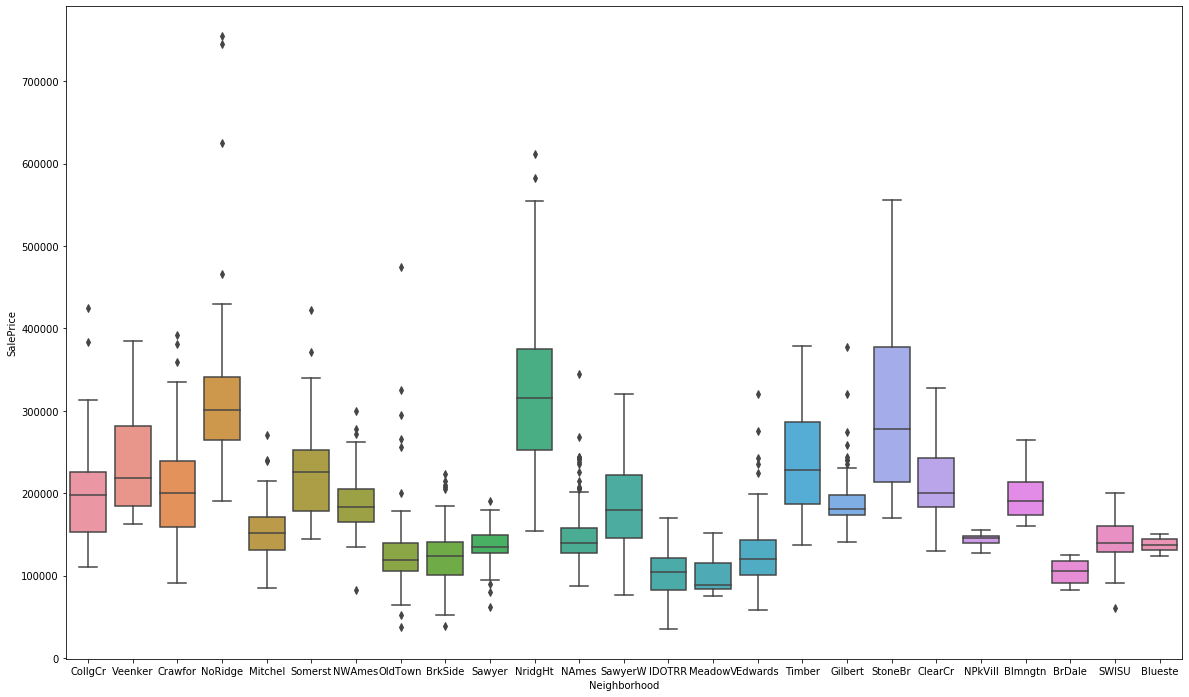

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,12))
sns.boxplot(train['Neighborhood'], train['SalePrice'])

In [39]:
train['Neighborhood'].value_counts()
## 데이터개수가 어느정도 있긴 한데 2개 9개 이런애들은 너무 적으므로 과적합될 수 있다. 이런 개수가 너무 적은건 그냥 빼버리는게 과적합을 막는 방법이 될 수 있음.

NAmes      225
CollgCr    150
OldTown    113
Edwards     98
Somerst     86
Gilbert     79
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     48
NoRidge     41
Timber      38
IDOTRR      36
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [40]:
test['Neighborhood'].value_counts() ## Blueste는 트레인에서는 2개인데 이거가지고 테스트의 8개를 예측하는건 과적합 문제가 생길 수 있다.

NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
NPkVill     14
BrDale      14
Veenker     13
Blmngtn     11
Blueste      8
Name: Neighborhood, dtype: int64

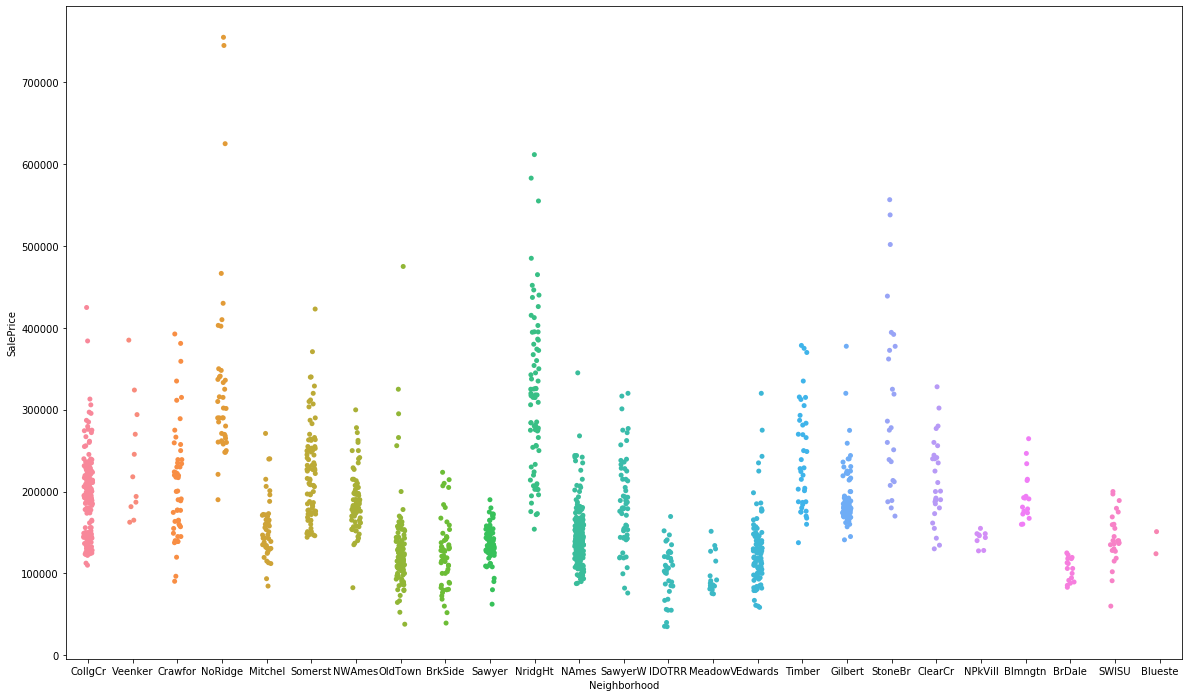

In [41]:
plt.figure(figsize = (20,12))
sns.stripplot(train['Neighborhood'], train['SalePrice'])

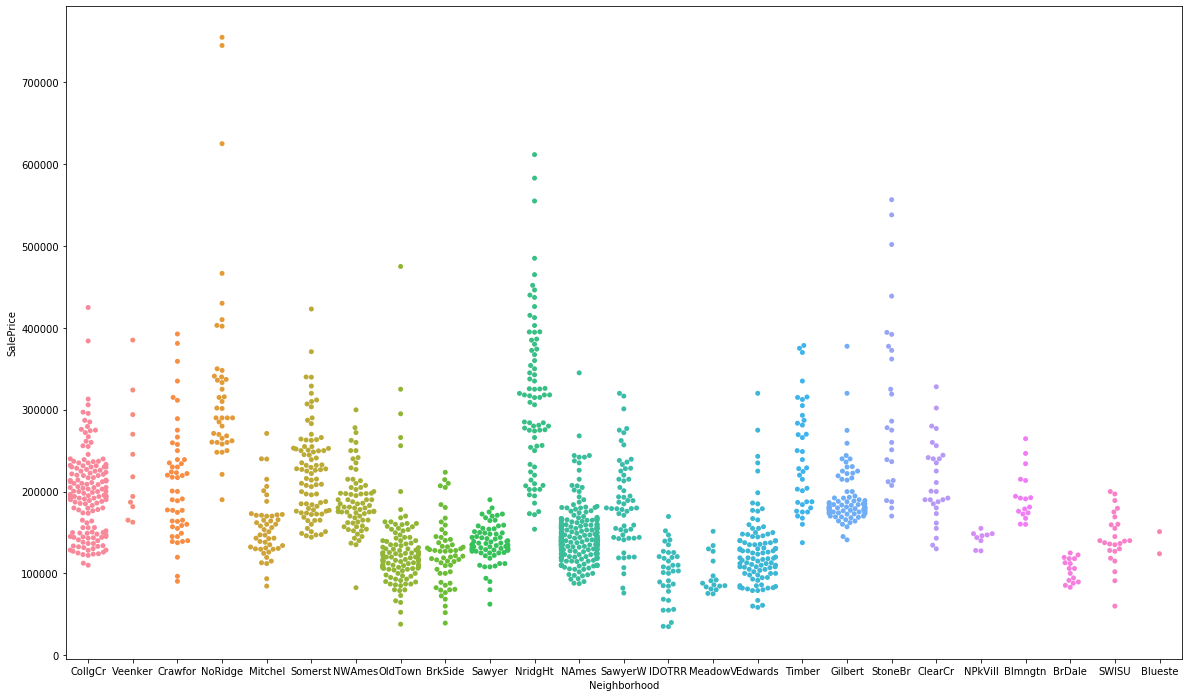

In [42]:
plt.figure(figsize = (20,12))
sns.swarmplot(train['Neighborhood'], train['SalePrice']) ## 어디에 데이터가 많이 몰려있는지까지 보임. 다만 데이터가 많으면 실행시간이 길어짐. 이때는 stripplot이용

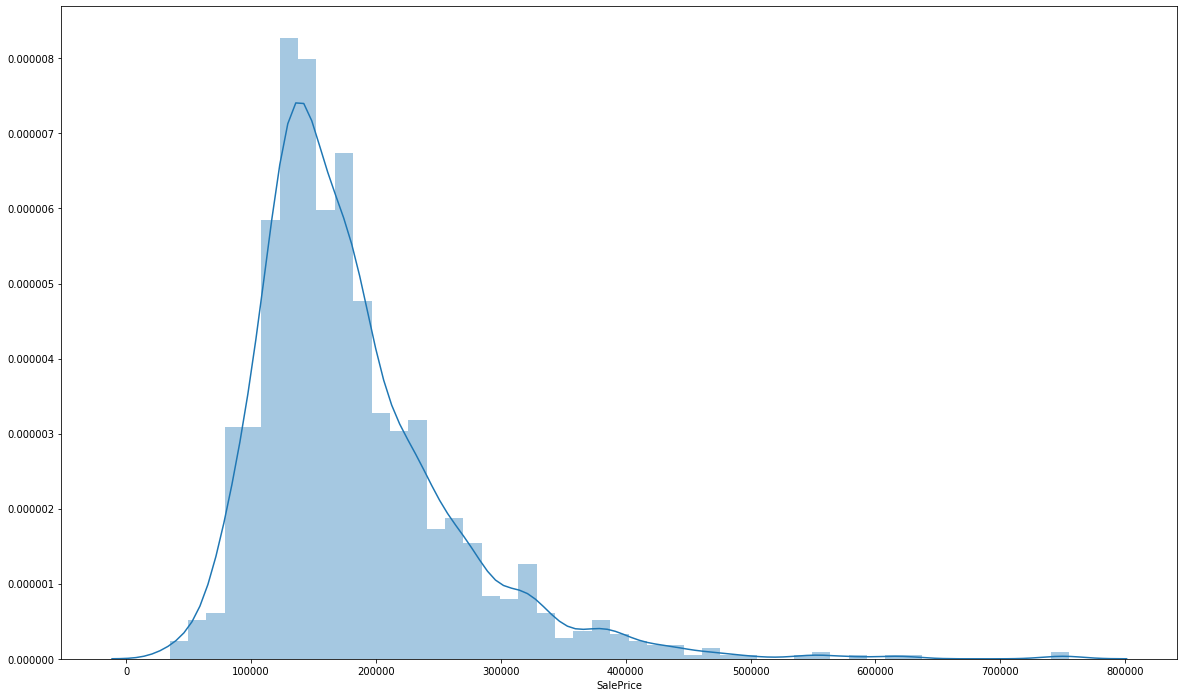

In [43]:
plt.figure(figsize = (20,12))
sns.distplot(train['SalePrice']) ## 한쪽으로 쏠려있고 꼬리가 길다(아웃라이어)